# 카톡 채팅 분석 2

# Data Load
---

In [2]:
f = open('C://Users//user/Github/Project_Kakao chat/카톡대화.txt', "r", encoding = "utf-8")
all_chat = []
for line in f :
    all_chat.append(line.replace("\n",""))
f.close()

all_chat[:10]

['신성재 님과 카카오톡 대화',
 '저장한 날짜 : 2020-02-27 01:47:43',
 '',
 '--------------- 2017년 1월 19일 목요일 ---------------',
 '[김성화] [오전 2:16] 오 팁 이만냥 받음',
 '[김성화] [오전 2:16] 재민 그동네 좀 좋네',
 '[김재민] [오전 2:19] 오',
 '[김재민] [오전 2:19] 난 카지노 3만원잃음',
 '[김재민] [오전 2:19] ㅋㅋㅋ',
 '[김성화] [오전 2:21] ㅋㅋ븅신']

In [3]:
err = []
name = []
time = []
text = []
for chat in all_chat :
    temp = chat.split("]")
    if len(temp) == 3 :
        n = temp[0][1:]
        t = temp[1][1:]
        txt = temp[2]
        name.append(n)
        time.append(t)
        text.append(txt)
    else :
        err.append(chat)

In [4]:
name[:10]

['김성화', '김성화', '김재민', '김재민', '김재민', '김성화', '김재민', '김재민', '김재민', '김성화']

In [5]:
time[:30]

['[오전 2:16',
 '[오전 2:16',
 '[오전 2:19',
 '[오전 2:19',
 '[오전 2:19',
 '[오전 2:21',
 '[오전 2:21',
 '[오전 2:21',
 '[오전 2:21',
 '[오전 2:22',
 '[오전 2:26',
 '[오전 2:26',
 '[오전 2:28',
 '[오전 2:29',
 '[오전 2:29',
 '[오전 2:35',
 '[오전 2:35',
 '[오전 2:35',
 '[오전 2:36',
 '[오전 2:36',
 '[오전 2:37',
 '[오전 2:38',
 '[오전 2:40',
 '[오전 11:28',
 '[오후 1:13',
 '[오후 2:24',
 '[오후 2:24',
 '[오후 2:25',
 '[오후 2:25',
 '[오후 2:25']

In [6]:
time[280:300]

['[오전 11:29',
 '[오전 11:29',
 '[오전 11:30',
 '[오전 11:30',
 '[오전 11:31',
 '[오전 11:32',
 '[오전 11:32',
 '[오전 11:33',
 '[오후 12:26',
 '[오후 12:26',
 '[오후 12:26',
 '[오후 12:27',
 '[오후 12:27',
 '[오후 12:27',
 '[오후 12:29',
 '[오후 12:33',
 '[오후 12:33',
 '[오후 12:34',
 '[오후 6:27',
 '[오후 6:27']

In [7]:
import datetime

In [8]:
datetime.datetime(2018,1,1,23,59)

datetime.datetime(2018, 1, 1, 23, 59)

In [9]:
dtime = []
bin_size = 15
for t in time :
    temp = t.replace(":"," ").split(" ")
    h = int(temp[1])
    m = int(temp[2])//bin_size*bin_size # 두번 나누면 몱
    if temp[0] == "[오후" and h != 12 :
        h = h + 12
    dtime.append(datetime.datetime(2018,1,1,h,m))

In [10]:
from collections import Counter

In [11]:
temp = Counter(dtime).most_common(1000)

In [12]:
stime = sorted(temp, key = lambda x : x[0])

In [13]:
stime

[(datetime.datetime(2018, 1, 1, 1, 0), 1982),
 (datetime.datetime(2018, 1, 1, 1, 15), 1736),
 (datetime.datetime(2018, 1, 1, 1, 30), 1647),
 (datetime.datetime(2018, 1, 1, 1, 45), 1598),
 (datetime.datetime(2018, 1, 1, 2, 0), 1122),
 (datetime.datetime(2018, 1, 1, 2, 15), 1140),
 (datetime.datetime(2018, 1, 1, 2, 30), 1100),
 (datetime.datetime(2018, 1, 1, 2, 45), 990),
 (datetime.datetime(2018, 1, 1, 3, 0), 462),
 (datetime.datetime(2018, 1, 1, 3, 15), 436),
 (datetime.datetime(2018, 1, 1, 3, 30), 420),
 (datetime.datetime(2018, 1, 1, 3, 45), 481),
 (datetime.datetime(2018, 1, 1, 4, 0), 250),
 (datetime.datetime(2018, 1, 1, 4, 15), 188),
 (datetime.datetime(2018, 1, 1, 4, 30), 126),
 (datetime.datetime(2018, 1, 1, 4, 45), 284),
 (datetime.datetime(2018, 1, 1, 5, 0), 166),
 (datetime.datetime(2018, 1, 1, 5, 15), 108),
 (datetime.datetime(2018, 1, 1, 5, 30), 109),
 (datetime.datetime(2018, 1, 1, 5, 45), 73),
 (datetime.datetime(2018, 1, 1, 6, 0), 71),
 (datetime.datetime(2018, 1, 1, 6, 

In [14]:
t, c = zip(*stime)

In [27]:
t

(datetime.datetime(2018, 1, 1, 1, 0),
 datetime.datetime(2018, 1, 1, 1, 15),
 datetime.datetime(2018, 1, 1, 1, 30),
 datetime.datetime(2018, 1, 1, 1, 45),
 datetime.datetime(2018, 1, 1, 2, 0),
 datetime.datetime(2018, 1, 1, 2, 15),
 datetime.datetime(2018, 1, 1, 2, 30),
 datetime.datetime(2018, 1, 1, 2, 45),
 datetime.datetime(2018, 1, 1, 3, 0),
 datetime.datetime(2018, 1, 1, 3, 15),
 datetime.datetime(2018, 1, 1, 3, 30),
 datetime.datetime(2018, 1, 1, 3, 45),
 datetime.datetime(2018, 1, 1, 4, 0),
 datetime.datetime(2018, 1, 1, 4, 15),
 datetime.datetime(2018, 1, 1, 4, 30),
 datetime.datetime(2018, 1, 1, 4, 45),
 datetime.datetime(2018, 1, 1, 5, 0),
 datetime.datetime(2018, 1, 1, 5, 15),
 datetime.datetime(2018, 1, 1, 5, 30),
 datetime.datetime(2018, 1, 1, 5, 45),
 datetime.datetime(2018, 1, 1, 6, 0),
 datetime.datetime(2018, 1, 1, 6, 15),
 datetime.datetime(2018, 1, 1, 6, 30),
 datetime.datetime(2018, 1, 1, 6, 45),
 datetime.datetime(2018, 1, 1, 7, 0),
 datetime.datetime(2018, 1, 1, 7

In [26]:
type(t[0])

datetime.datetime

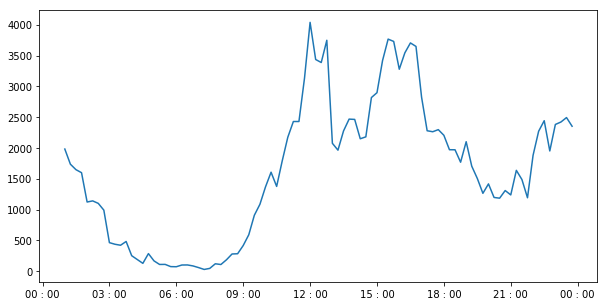

In [20]:
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
plt.plot_date(t,c,fmt='-') # fmt는 실선인지 점선인지 모양 구분
ax.xaxis.set_major_formatter(DateFormatter("%H : %M"))
ax.xaxis.set_tick_params(labelsize = 10) #rotation = 30
plt.savefig("C://Users//user/Github/Project_Kakao chat/time graph.png", format='png', bbox_inches="tight")

In [60]:
rtime = []
for t in time :
    temp = t.replace(":"," ").split(" ")
    h = int(temp[1])
    m = int(temp[2])
    if temp[0] == "[오후" and h != 12 :
        h = h + 12
    rtime.append(datetime.datetime(2018,1,1,h,m))

In [61]:
rtime

[datetime.datetime(2018, 1, 1, 2, 16),
 datetime.datetime(2018, 1, 1, 2, 16),
 datetime.datetime(2018, 1, 1, 2, 19),
 datetime.datetime(2018, 1, 1, 2, 19),
 datetime.datetime(2018, 1, 1, 2, 19),
 datetime.datetime(2018, 1, 1, 2, 21),
 datetime.datetime(2018, 1, 1, 2, 21),
 datetime.datetime(2018, 1, 1, 2, 21),
 datetime.datetime(2018, 1, 1, 2, 21),
 datetime.datetime(2018, 1, 1, 2, 22),
 datetime.datetime(2018, 1, 1, 2, 26),
 datetime.datetime(2018, 1, 1, 2, 26),
 datetime.datetime(2018, 1, 1, 2, 28),
 datetime.datetime(2018, 1, 1, 2, 29),
 datetime.datetime(2018, 1, 1, 2, 29),
 datetime.datetime(2018, 1, 1, 2, 35),
 datetime.datetime(2018, 1, 1, 2, 35),
 datetime.datetime(2018, 1, 1, 2, 35),
 datetime.datetime(2018, 1, 1, 2, 36),
 datetime.datetime(2018, 1, 1, 2, 36),
 datetime.datetime(2018, 1, 1, 2, 37),
 datetime.datetime(2018, 1, 1, 2, 38),
 datetime.datetime(2018, 1, 1, 2, 40),
 datetime.datetime(2018, 1, 1, 11, 28),
 datetime.datetime(2018, 1, 1, 13, 13),
 datetime.datetime(2018

In [43]:
import pandas as pd
a = pd.DataFrame(name)
b = pd.DataFrame(time)
c = pd.DataFrame(txt)

In [44]:
a.columns = ["name"]
b.columns = ["time"]
c.columns = ["text"]

df = pd.concat([a,b,c],axis=1)
df[:10]

,name,time,text
0,김성화,[오전 2:16,오 팁 이만냥 받음
1,김성화,[오전 2:16,재민 그동네 좀 좋네
2,김재민,[오전 2:19,오
3,김재민,[오전 2:19,난 카지노 3만원잃음
4,김재민,[오전 2:19,ㅋㅋㅋ
5,김성화,[오전 2:21,ㅋㅋ븅신
6,김재민,[오전 2:21,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
7,김재민,[오전 2:21,여기 한심하게돈많은놈들많더
8,김재민,[오전 2:21,개부럽
9,김성화,[오전 2:22,ㅋㅋㅋ그새끼들 연락처받아놔라
